# **菊安酱与菜菜的Python机器学习可视化**

## 第七期 变化图

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## **第七章 变化图 Change**

变化图是描述数据变化的图像，基本是以折线图的形式进行展现，并且横坐标常常是时间<br>
折线图是最常见的可视化图像之一，它代码简单解读也非常简单，甚至我们可以使用Excel来绘制它  
但它其实可以有很多不同的变体：多个坐标轴，为曲线上色，叠加曲线的面积等等……<br>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/07%20change.PNG" align="center" />

><img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/%E6%83%8A%E5%8F%B9.PNG" align="center" />   
>注意，在本章之中图像的顺序会和50图原博客中的顺序不太一致。我们将先讲解41，44号图像，因为他们使用了一致的数据集。  
>然后我们再讲解43，45和46号图，他们都是与普通折线图比起来，改变了一些性质来表现出更多信息的图像。  
>最后我们会讲解42号图像，这是一张基于统计学知识来补充折线图的图像。

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 42/50 带有误差带的折线图

你对统计学有基本的了解吗？<br>
<br>
在统计学中，我们总是根据某个规则对数据进行采集的，比如，我们想获得本季度所有淘宝店铺的总销量，我们就会依据我们的需求去采集数据。在任意采集规则下，都存在着一个“真实、精确的全部数据”，这个数据被称为“总体”。当总体所涉及到的范围足够大的时候，受到财力、精力、时间等因素的限制，它是不可能被获得的，或者说，获得它是不经济的、没必要的。<br>
<br>
例如，我们可以普查全球人口，却不敢保证获得的人口数是绝对正确的数额。我们可以计算国人的平均工资，却不能保证收集到全部14亿人口每个人的真实收入。我们可以调查一个班级中所有人的分数均值，但我们无法把这个班级的均值推广到任意同年级的班级上去。这种“总体”的不可获得带来了一些问题：在可视化的时候，我们常使用总量、均值这些数字来绘制趋势、阐述观点，但我们能够获得的数据量及其精确度都是有限的，我们怎么能保证自己能收集到的这些数据所表现出来的性质，与那个“不可获得的总体”的性质是一致的呢？这就是统计学中经典的**统计推断问题**。<br>
<br>
在可视化中，大部分时候，我们都不去考虑图像所使用的数据能否反映总体的性质。但如果我们希望严谨一点儿，我们可以使用**置信区间**来帮助我们。如下所示，两张图像分别表示不同时段中的订单数量，围绕在图像附近的误差带就是关于数据取值的95%的置信区间。我们稍后会来解释置信区间的含义，先来看看这两张图的绘制吧。

><img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/%E6%83%8A%E5%8F%B9.PNG" align="center" />   
>注意，在进行课程研发过程中，下方右侧的图像所使用的数据由于被积极拒绝所以无法调用。大家可以试着运行本课件最后的代码尝试绘制图像，不过菜菜尝试了很多次、很多方法去解决相关问题，都是失败的。因此在本次讲解中，我们将重点为大家讲解左下的图像。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/42%20-%20.PNG" align="center" />

图左：
> 横坐标：时间，总计24小时  
> 纵坐标：每小时中的订单数量  

图右：
> 横坐标：时间，总计45天   
> 纵坐标：每天的订单数量

### 1. 导入需要的模块和库

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，处理数据

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/user_orders_hourofday.csv")

C:\Python\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.head()

,user_id,order_hour_of_day,quantity
0,1,7,20
1,1,8,23
2,1,9,12
3,1,12,11
4,1,14,10


不难发现，一个user_id对应着一个用户，而每个用户会在每天的不同时间段下不同的订单，且每单购买的数量不同。当我们以时间段为横坐标、订单数量为纵坐标时，就必须要对订单数量进行聚合。我们可以对所有该时间段下的订单进行加和，得到每个时间段的订单总数，不过这样做就会失去“订单数量”这个维度的信息。所以，我们可以让纵坐标为“每个订单中平均的购买量”，这样既可以保留每小时的趋势，又可以保留“订单数量”这个维度。

In [13]:
df.shape #查看订单量，一共有157万条数据

(1572599, 3)

In [54]:
#每个小时有多少个订单？
df.groupby("order_hour_of_day").quantity.count()

order_hour_of_day
0      16377
1       9421
2       5970
3       4516
4       4580
5       7294
6      19342
7      46965
8      78268
9     102093
10    114740
11    119411
12    119837
13    121128
14    121882
15    121902
16    118183
17    105746
18     90285
19     74654
20     59504
21     46228
22     37848
23     26425
Name: quantity, dtype: int64

In [11]:
#每个小时总共订购了多少货物？
df.groupby("order_hour_of_day").quantity.sum()

order_hour_of_day
0      170757
1       93636
2       56622
3       41504
4       41647
5       71514
6      228147
7      686666
8     1339328
9     1932196
10    2160291
11    2137404
12    2043662
13    2081735
14    2124883
15    2125203
16    2042222
17    1717211
18    1368881
19    1055634
20     781316
21     585894
22     462398
23     299921
Name: quantity, dtype: int64

In [12]:
#每个小时内，平均每个订单订购了多少货物？
df.groupby("order_hour_of_day").quantity.mean()
#这就是我们要使用的纵坐标，让我们给它命名为df_mean

order_hour_of_day
0     10.426635
1      9.939072
2      9.484422
3      9.190434
4      9.093231
5      9.804497
6     11.795419
7     14.620803
8     17.112076
9     18.925842
10    18.827706
11    17.899557
12    17.053681
13    17.186241
14    17.433936
15    17.433701
16    17.280167
17    16.239016
18    15.161777
19    14.140354
20    13.130479
21    12.674007
22    12.217237
23    11.349896
Name: quantity, dtype: float64

In [14]:
df_mean = df.groupby("order_hour_of_day").quantity.mean()

### 3. 绘制不含置信区间的折线图

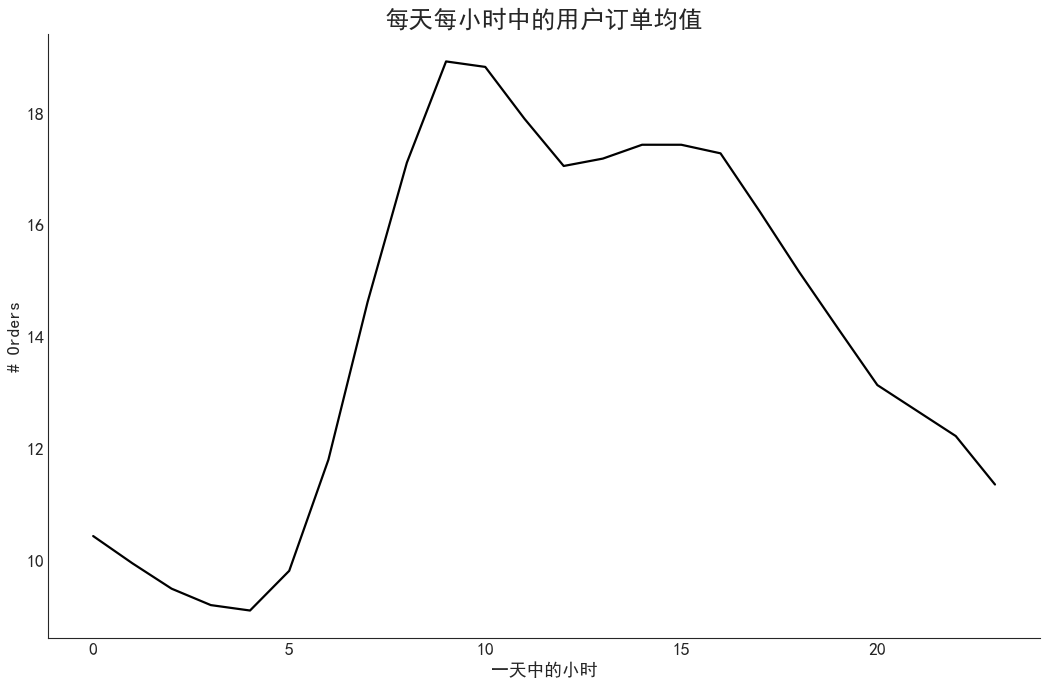

In [35]:
# 绘制图像
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Orders", fontsize=16) #y轴的标签，‘# Orders’对中文用户来说理解起来会有些困难，如果你希望，也可以把纵坐标的标题改成“货物量/单”
x = df_mean.index #取出索引（时间段）作为图像的横坐标
plt.plot(x, df_mean, color="black", lw=2) 

# 装饰图像
# 首先让边框变淡一些
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.title("每小时中平均每个订单中的货物量", fontsize=22)
plt.xlabel("一天中的小时")
plt.show()

### 4. 装饰图像

到这里你可能注意到几个问题：<br>
- 第一，横坐标轴没有显示出24个小时，而是按照5个小时的区间显示出了5个值
- 第二，我们还没有绘制原图上存在的横向虚线

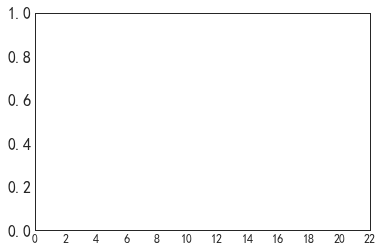

In [47]:
#为了解决第一个问题，我们添加这行代码：
plt.xticks(x[::2] #这里指示横坐标上要写标尺的位置
           ,[str(d) for d in x[::2]] #这里指示在相应的位置上需要写的字符串，在这里也就是数字本身，不过被我们转换成了字符串形式
           ,fontsize=12 #字体
          );

In [42]:
x[::2] #首先这里是以2为步长，每2小时显示一个标尺，如果你希望每个小时都显示标出，也可以直接使用x，而不是x[::2]放入xticks函数中

Int64Index([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], dtype='int64', name='order_hour_of_day')

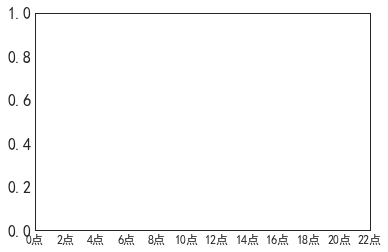

In [46]:
plt.xticks(x[::2] #这里指示横坐标上要写标尺的位置
           ,["{}点".format(str(d)) for d in x[::2]] #试试把这行改成文字？
           ,fontsize=12 #字体
          );

不过为了简洁，我们还是不显示中文了

In [ ]:
#来解决第二个问题，绘制横线
#你是否注意到，现在的图像中，x轴不是以0点、而是以某个小于0的数为起点？

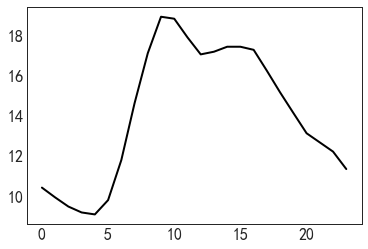

In [50]:
plt.plot(x, df_mean, color="black", lw=2);

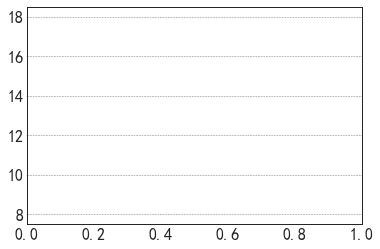

In [51]:
#让横坐标轴的标签显示为24小时，而不是像现在一样每隔5小时显示一次
#首先使用get_xlim()函数获得现在的图像中，x轴的真实起点与重点
s, e = plt.gca().get_xlim()
#将横坐标的最大值和最小值作为横坐标的范围，在运行之前，你会注意到图像的两边是有白色空隙的
plt.xlim(s, e)

#从s开始，到e结束，绘制纵向的横线
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5) #绘制横线的函数

plt.show()

### 5. 将全部代码排列在一起

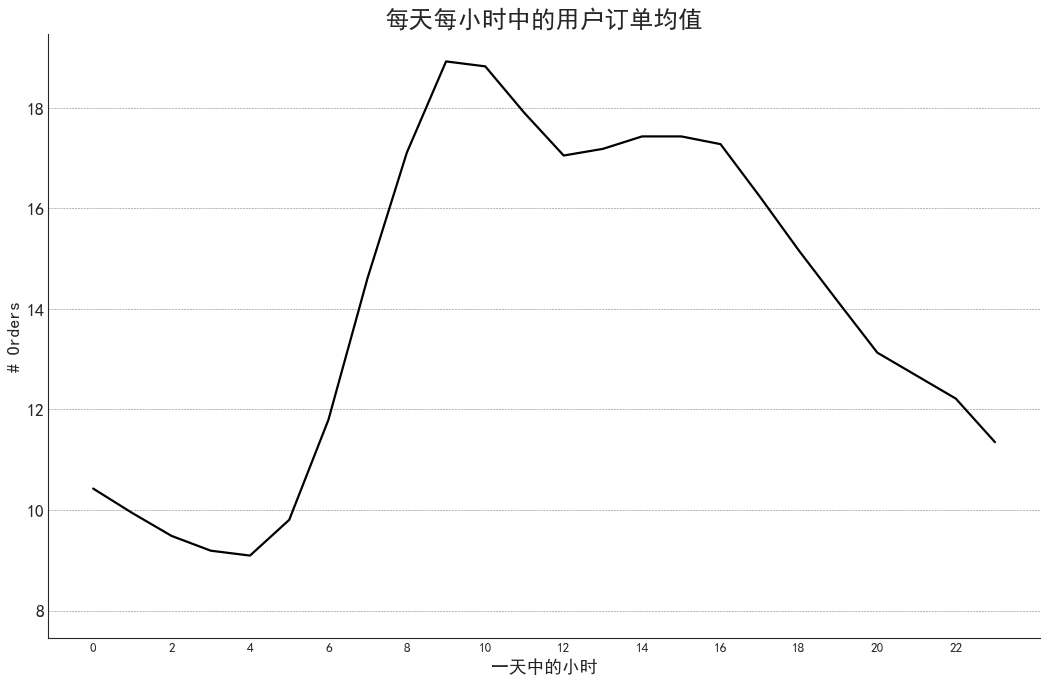

In [52]:
# 绘制图像
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Orders", fontsize=16) #y轴的标签，‘# Orders’对中文用户来说理解起来会有些困难，如果你希望，也可以把纵坐标的标题改成“用户订单均值”
x = df_mean.index #取出索引（时间段）作为图像的横坐标
plt.plot(x, df_mean, color="black", lw=2)

#设置标尺
plt.xticks(x[::2] #这里指示横坐标上要写标尺的位置
           ,[str(d) for d in x[::2]] #这里指示在相应的位置上需要写的字符串，在这里也就是数字本身，不过被我们转换成了字符串形式
           ,fontsize=12 #字体
          );

# 装饰图像
# 首先让边框变淡一些
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.title("每小时中平均每个订单中的货物量", fontsize=22)
plt.xlabel("一天中的小时")

#让横坐标轴的标签显示为24小时，而不是像现在一样每隔5小时显示一次
#首先使用get_xlim()函数获得现在的全部横坐标中的最大值和最小值
s, e = plt.gca().get_xlim()
plt.xlim(s, e) #将横坐标的最大值和最小值作为横坐标的标尺显示

#从s开始，到e结束，绘制纵向的横线
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5) #绘制横线的函数

plt.show()

### 6. 认识置信区间

我们现在使用了每小时中订单总量/订单数而获得的均值，但是这个均值能否代表这个小时中“总体数据的真实均值”呢？我们无法确定。我们现有的150W+样本，只是我们从过去、未来、所有已经发生和即将发生的订单中可以获得的“样本集”，它不是真正的总体，因此它的均值也不是真正的总体的均值。为了更严谨，我们将使用置信区间来帮助我们。

 - 首先，置信区间是一个数据范围，可表示为[a,b]，它通常和某个概率一起出现。例如，概率P下的置信区间，就表明某个统计量的数额落在这个区间里的可能性是P。<br>
 - 虽然我们无法确认我们样本集的均值是否就是总体的均值，但是我们可以从样本集的均值去推断出总体的均值所在的范围，并且给出总体均值落在这个范围中的概率，这个范围就是置信区间。<br>
 - 我们来举个例子，比如，在我们现在使用的数据中，0点下单的平均每单货品数是10.426635，假设它的95%的置信区间为[-15,15]，则说明，那个不可获得的、在0点下单的全部订单“总体”的“平均每单货品数”落在[-15,15]这个区间中的可能性是95%。<br>

In [58]:
df.groupby("order_hour_of_day").quantity.mean()

order_hour_of_day
0     10.426635
1      9.939072
2      9.484422
3      9.190434
4      9.093231
5      9.804497
6     11.795419
7     14.620803
8     17.112076
9     18.925842
10    18.827706
11    17.899557
12    17.053681
13    17.186241
14    17.433936
15    17.433701
16    17.280167
17    16.239016
18    15.161777
19    14.140354
20    13.130479
21    12.674007
22    12.217237
23    11.349896
Name: quantity, dtype: float64

所以你可以看到在目标图像中，我们的折线被一个填上色的区间所包围，这个区间其实就是置信区间。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/42%20-%20.PNG" align="center" />

常见的P有95%，97.5%，99%三种，且当数据满足正态分布时，一组数据的95%的置信区间的上界就等于 **均值 + 这组数据的标准误 * 1.96**，下界就等于**均值 - 这组数据的标准误 * 1.96**。<br>
无论是95%，还是标准误 * 1.96，你都可以在统计学中找到严格的推导和证明。但在这里，我们不就这个问题去展开来谈，我们希望大家更多地关注到置信区间的含义，并且知道他是怎样被计算出来的。<br>
接下来，我们使用scipy中的sem函数来计算标准误，并把这个区间绘制到我们的图像中去。

In [60]:
from scipy.stats import sem

In [ ]:
#首先求解每个时段下的货物量/单，在这里每个时段得到一个数字

In [61]:
df_mean = df.groupby('order_hour_of_day').quantity.mean()

In [ ]:
#对数据中每个时段下的订单都求取标准误，注意这里没有聚合函数，因为标准误是对每个时段下的全部样本进行求解，而不是对单一数字进行求解
#对求解出的标准误乘以1.96，得到95%的置信区间的边界

In [62]:
df_se = df.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96)

In [63]:
df_se

order_hour_of_day
0     0.133649
1     0.155482
2     0.201925
3     0.201808
4     0.209330
5     0.199743
6     0.182412
7     0.145928
8     0.133414
9     0.132828
10    0.116479
11    0.099794
12    0.091048
13    0.091873
14    0.093446
15    0.094254
16    0.094085
17    0.092279
18    0.093627
19    0.095181
20    0.098311
21    0.109863
22    0.113137
23    0.121689
Name: quantity, dtype: float64

### 7. 完成完整的图像

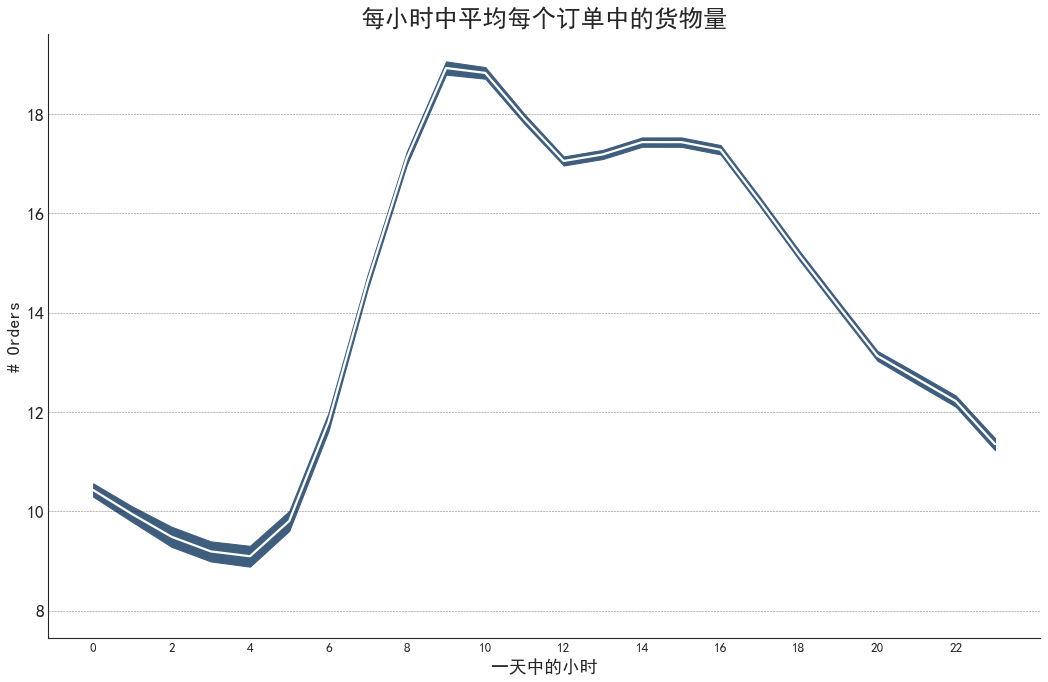

In [65]:
from scipy.stats import sem

#准备数据
df_mean = df.groupby('order_hour_of_day').quantity.mean() #计算均值
df_se = df.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96) #计算置信区间

# 绘制图像
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Orders", fontsize=16) 
x = df_mean.index #取出索引（时间段）作为图像的横坐标
plt.plot(x, df_mean, color="white", lw=2) #将图像中的黑线改成白色的线，因为置信区间即将被填上比较深的颜色
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D") #使用填色函数fill_between，上界为均值+标准误*1.96，下界为均值-标准误*1.96

#设置标尺
plt.xticks(x[::2] ,[str(d) for d in x[::2]] ,fontsize=12);

# 装饰图像
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.title("每小时中平均每个订单中的货物量", fontsize=22)
plt.xlabel("一天中的小时")

s, e = plt.gca().get_xlim()
plt.xlim(s, e) 

#从s开始，到e结束，绘制纵向的横线
for y in range(8, 20, 2):
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5) #绘制横线的函数

plt.show()

### 9. 以同样的思维绘制另一组数据的图像（数据已失效）

In [71]:
from dateutil.parser import parse
from scipy.stats import sem

In [69]:
#导入数据这一步走不通，其他的逻辑基本与上图一致，大家可以看看代码
df_raw = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/orders_45d.csv'
                     #,parse_dates=['purchase_time', 'purchase_date']
                    )

URLError: <urlopen error [WinError 10061] 由于目标计算机积极拒绝，无法连接。>

In [72]:
#准备数据，计算均值与置信区间
df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

#绘图，代码与上图一模一样
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Daily Orders", fontsize=16)  
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

#装饰图像
#淡化边缘
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]] , fontsize=12)
plt.title("Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)", fontsize=20)

#设置横纵坐标的区间
s, e = plt.gca().get_xlim()
plt.xlim(s, e-2)
plt.ylim(4, 10)

#绘制横向的虚线
for y in range(5, 10, 1):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

NameError: name 'df_raw' is not defined